# Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Data.csv')

In [11]:
df

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Purchased').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Purchased'].value_counts()
    for x_label, grp in df.groupby('Country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country')
_ = plt.ylabel('Purchased')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Purchased'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Purchased', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Salary', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Purchased'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Salary', y='Purchased', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

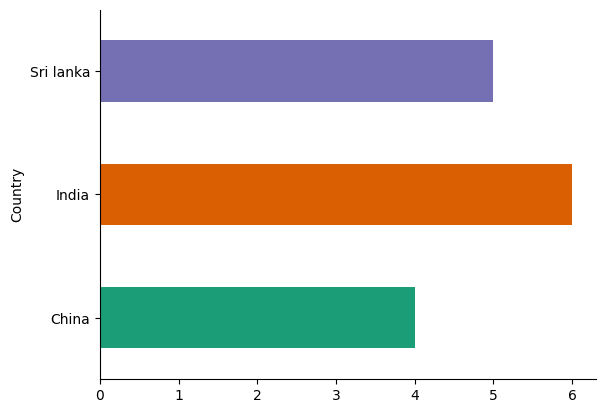

In [29]:
df.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

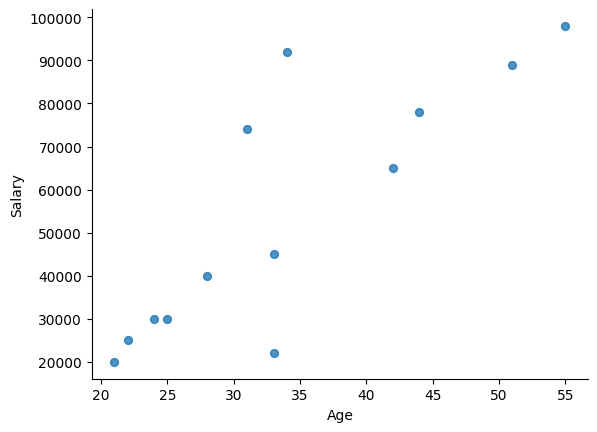

In [28]:
df.plot(kind='scatter', x='Age', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df.head()

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes


In [13]:
df.tail()

,Country,Age,Salary,Purchased
10,Sri lanka,21.0,20000.0,No
11,China,25.0,30000.0,Yes
12,India,33.0,45000.0,Yes
13,India,42.0,65000.0,Yes
14,Sri lanka,33.0,22000.0,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    15 non-null     object 
 1   Age        14 non-null     float64
 2   Salary     14 non-null     float64
 3   Purchased  15 non-null     object 
dtypes: float64(2), object(2)
memory usage: 608.0+ bytes


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,14.0,33.714286,10.593384,21.0,25.75,32.0,40.0,55.0
Salary,14.0,54857.142857,27980.369885,20000.0,30000.00,52500.0,77000.0,98000.0


In [17]:
df.shape

(15, 4)

In [26]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [30]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [33]:
X.shape

(15, 3)

In [34]:
y.shape

(15,)

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [40]:
X

array([['India', 34.0, 92000.0],
       ['Sri lanka', 22.0, 25000.0],
       ['China', 31.0, 74000.0],
       ['Sri lanka', 29.0, 54857.142857142855],
       ['China', 55.0, 98000.0],
       ['India', 24.0, 30000.0],
       ['Sri lanka', 28.0, 40000.0],
       ['India', 33.714285714285715, 60000.0],
       ['China', 51.0, 89000.0],
       ['India', 44.0, 78000.0],
       ['Sri lanka', 21.0, 20000.0],
       ['China', 25.0, 30000.0],
       ['India', 33.0, 45000.0],
       ['India', 42.0, 65000.0],
       ['Sri lanka', 33.0, 22000.0]], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder

labelencoder_x = LabelEncoder()
X[:, 0] = labelencoder_x.fit_transform(X[:, 0])

In [43]:
X

array([[1, 34.0, 92000.0],
       [2, 22.0, 25000.0],
       [0, 31.0, 74000.0],
       [2, 29.0, 54857.142857142855],
       [0, 55.0, 98000.0],
       [1, 24.0, 30000.0],
       [2, 28.0, 40000.0],
       [1, 33.714285714285715, 60000.0],
       [0, 51.0, 89000.0],
       [1, 44.0, 78000.0],
       [2, 21.0, 20000.0],
       [0, 25.0, 30000.0],
       [1, 33.0, 45000.0],
       [1, 42.0, 65000.0],
       [2, 33.0, 22000.0]], dtype=object)

In [45]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [46]:
y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(12, 3)

In [49]:
X_test.shape

(3, 3)

In [50]:
y_train.shape

(12,)

In [51]:
y_test.shape

(3,)

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
X_train

array([[-0.20851441,  0.818284  ,  0.52241638],
       [-0.20851441, -0.92677299, -0.87386012],
       [-1.4596009 ,  1.6908125 ,  1.47986312],
       [-1.4596009 , -0.24813972,  0.8814589 ],
       [ 1.04257207, -1.12066822, -1.07332819],
       [ 1.04257207, -0.0542445 , -1.19300903],
       [-1.4596009 ,  2.07860294,  1.83890564],
       [-0.20851441,  0.0150038 ,  0.3229483 ],
       [ 1.04257207, -1.21761583, -1.27279626],
       [-0.20851441, -0.0542445 , -0.27545591],
       [ 1.04257207, -0.44203494,  0.11778115],
       [ 1.04257207, -0.53898255, -0.47492398]])

In [54]:
X_test

array([[-0.20851441,  1.01217922,  1.04103336],
       [-1.4596009 , -0.82982538, -0.87386012],
       [-0.20851441,  0.04270311,  1.59954396]])